# Digit Classifier Neural Network Example

* You should spend about 40 minutes on this exercise.

* In this example we're going to train a NN to solve a classic machine learning task. This is the example we discussed in the lecture. We want the NN to look at an image of a digit, and classify it as 0,1,...9. The dataset is known as MNIST, and contains many black and white images, each of 28x28 pixels. There are 60,000 examples to train the NN on, and 10,000 examples to test on.

* $X$ is our input, and is multidimensional (one value for each pixel). Our target, $Y$, is also multidimensional (10 values), which represents the predicted probabilities of the image being each digit 0,1...9.

* Before running the code, it may be helpful to choose Runtime>Change runtime type> and select GPU. Then restart runtime. This should speed up training.

* Try to run the below code. Either click on the start arrow at the top of each block of code, or to run it all, choose from the menu, Runtime>Run all. Several lines in the code are incomplete (denoted by `###...`). Follow the instructions to complete these.

* There are questions at the end for you to answer and investigate.


In [0]:
import tensorflow.keras as keras # note that this is upgrading to v2 soon...
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

In [0]:
# download the dataset

# input image dimensions
img_rows, img_cols = 28, 28
num_classes = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# preprocess the data so it is in the range [0,1]
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# create the NN

n_hidden = 20 # how many hidden nodes in the NN?
activation_in = 'relu'
l_rate = 0.001

is_conv_net = True
if is_conv_net:
  # code to create a convolutional NN
  NN = Sequential()
  NN.add(Conv2D(32, kernel_size=(3, 3),
                  activation=activation_in,input_shape=input_shape,strides=(1, 1)
               )
            )
  NN.add(Conv2D(32, (3, 3), strides=(1, 1), activation=activation_in))
  NN.add(MaxPooling2D(pool_size=(1, 1)))
  NN.add(Conv2D(64, (3, 3), strides=(1, 1), activation=activation_in))
  NN.add(Conv2D(64, (3, 3), strides=(1, 1), activation=activation_in))
  NN.add(MaxPooling2D(pool_size=(1, 1)))
  NN.add(Flatten())
  NN.add(Dropout(0.4))
  NN.add(Dense(128, activation=activation_in))
  NN.add(Dropout(0.4))
  NN.add(Dense(num_classes, activation='softmax'))
else:
  # fully connected NN
  NN = Sequential()
  NN.add(Flatten(input_shape=input_shape))
  # NN.add(Dense(n_hidden,activation=activation_in,input_shape=input_shape))
  NN.add(Dense(n_hidden,activation=activation_in))
  NN.add(Dense(num_classes, activation='softmax'))

NN.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=l_rate),metrics=['accuracy'])

print(NN.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________

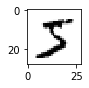

NN prediction: 8 




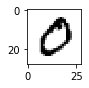

NN prediction: 8 




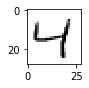

NN prediction: 8 




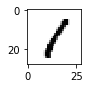

NN prediction: 8 




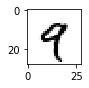

NN prediction: 8 




In [0]:
# visualise some examples of the digits and what the NN predictions are before training
for i in range(5):
  plt.figure(figsize = (1,1))
  plt.imshow(x_train[i][:,:,0],cmap='Greys')
  plt.show()
  nn_prediction = NN.predict(np.expand_dims(x_train[i],0))
  predicted_label = np.argmax(nn_prediction)
  print('NN prediction:', predicted_label,'\n\n')

In [0]:
# now train the NN
n_epochs = 12 # how many times to cycle through the data
batch_size = 64

hist = NN.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(x_test[0:1000], y_test[0:1000]))
score = NN.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 1000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1558 - acc: 0.9528 - val_loss: 0.0404 - val_acc: 0.9880
Epoch 2/12
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0638 - acc: 0.9812 - val_loss: 0.0406 - val_acc: 0.9850
Epoch 3/12
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0464 - acc: 0.9859 - val_loss: 0.0265 - val_acc: 0.9920
Epoch 4/12
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0373 - acc: 0.9888 - val_loss: 0.0221 - val_acc: 0.9920
Epoch 5/12
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0322 - acc: 0.9898 - val_loss: 0.0279 - val_acc: 0.9910
Epoch 6/12
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0270 - acc: 0.9913 - val_loss: 0.0275 - val_acc: 0.9940
Epoch 7/12
60000/60000 [==============================] - 8s 142us/sample - loss: 0.0230 - acc: 0.9927 - val_lo

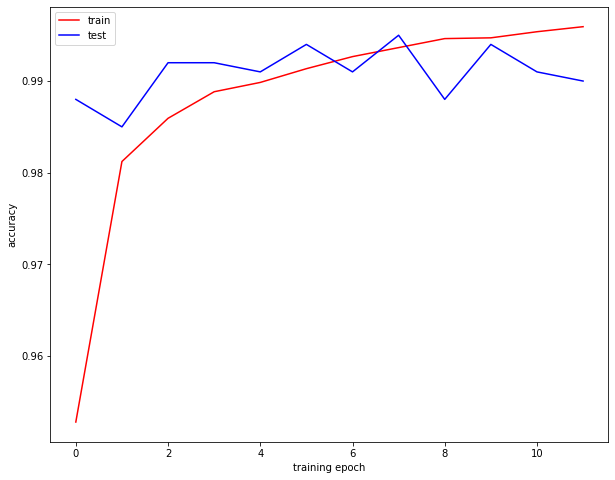

In [0]:
# check how training looked
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(hist.history['acc'], color='r',label='train')
ax.plot(hist.history['val_acc'], color='b',label='test')
ax.legend()
ax.set_ylabel('accuracy')
ax.set_xlabel('training epoch')
fig.show()

In [0]:
# we'll now evaluate the model
# recompute the accuracy
y_test_pred = NN.predict(x_test)

################################################################################
# complete this section to calculate accuracy yourself
# (google classification accuracy if needed)
acc_manual = np.mean(np.argmax(y_test_pred,axis=-1) == np.argmax(y_test,axis=-1))
################################################################################

# check that it matches the mse that's automatically calculated
acc_automatic = NN.evaluate(x_test,y_test)[1]

print('manual test accuracy calc:', round(acc_manual,4))
print('automatic test accuracy calc:', round(acc_automatic,4))

10000/10000 [==============================] - 1s 80us/sample - loss: 0.0331 - acc: 0.9927
manual test accuracy calc: 0.9927
automatic test accuracy calc: 0.9927


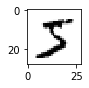

NN prediction: 5 




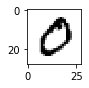

NN prediction: 0 




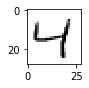

NN prediction: 4 




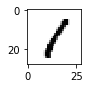

NN prediction: 1 




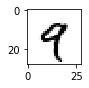

NN prediction: 9 




In [0]:
################################################################################
# visualise some examples of the digits and what the NN predictions are
# now that we have trained the NN
for i in range(5):
  plt.figure(figsize = (1,1))
  plt.imshow(x_train[i][:,:,0],cmap='Greys')
  plt.show()
  nn_prediction = NN.predict(np.expand_dims(x_train[i],0))
  predicted_label = np.argmax(nn_prediction)
  print('NN prediction:', predicted_label,'\n\n')
################################################################################

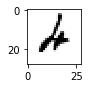

True label: 4
NN prediction: 6


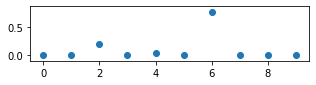

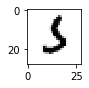

True label: 5
NN prediction: 3


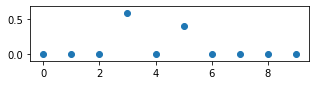

In [0]:
################################################################################
# find examples of where predicted incorrectly
# plot the confidence of each predicted class 
for i in range(400):
  nn_prediction = NN.predict(np.expand_dims(x_test[i],0))
  predicted_label = np.argmax(nn_prediction)
  true_label = np.argmax(y_test[i])
  if predicted_label != true_label:
    plt.figure(figsize = (1,1))
    plt.imshow(x_test[i][:,:,0],cmap='Greys')
    plt.show()
    print('True label:', true_label)
    print('NN prediction:', predicted_label)
    plt.figure(figsize = (5,1))
    plt.scatter(np.arange(0,10),nn_prediction)
    plt.show()
    print('\n\n')
################################################################################

# Questions

0. Complete the code where needed. Check you can manually recalculate accuracy. Find some examples of where it predicts incorrectly.

Now answer the below questions.

1. What are your thoughts on the incorrect predictions? Why is it making them?

2. Spend a while changing the NN size and number of training epochs. What is the best test accuracy you can acheive? Write this down.

3. Take a photo of your own handwriting. Upload it using code provided below these questions and have your NN analyse it. Does it work? How could it be improved?

4. So far we have used a fully-connected NN. Try to implement a convolutional NN. (Borrow code from https://keras.io/examples/mnist_cnn/.) What test accuracy do you get? Try making an even deeper NN. What's the best accuracy you can get? Have a look online for inspiration on how to further improve the model.

In [0]:
uploaded = files.upload()

Saving digit_4.png to digit_4.png


Using TensorFlow backend.


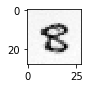

Probabilities: [[5.3743525e-09 1.1466459e-11 1.4527292e-07 3.6127856e-06 7.1511082e-09
  7.8560797e-06 2.4878309e-06 1.7518479e-07 9.9996769e-01 1.7966087e-05]]
NN prediction: 8 




In [0]:
from keras.preprocessing import image
# img_path = 'name_of_your_file.png'
img_path = 'digit_4.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

################################################################################
# first try without preprocessing
# you may need to do add some processing to make sure it's similar to the train data
# look at properties of x_train to understand what we're aiming for

x -= x.min()
x /= x.max()
x=1-x
################################################################################
plt.figure(figsize = (1,1))
plt.imshow(x[0,:,:,0],cmap='Greys')
plt.show()

nn_prediction = NN.predict(x)
print('Probabilities:',nn_prediction)
predicted_label = np.argmax(nn_prediction)
print('NN prediction:', predicted_label,'\n\n')